## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn import datasets , linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## [Step1] Data loading, preprocessing, and exploring

In [2]:
# 載入酒類資料集, 並觀察原始資料
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# 整理原始資料, 並進行EDA
df_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df_target = pd.DataFrame(boston['target'], columns=['target'])
df = pd.concat([df_boston, df_target], axis=1)
df  # 全為數值型資料

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df_boston.isnull().sum()  #沒有缺值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


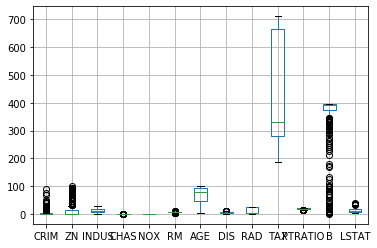

In [6]:
df_boston.boxplot()

## [Step2] Least Square Regression

In [7]:
# 此資料集為回歸問題, 故使用LinearRegression

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(df_boston, df_target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
reg = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = reg.predict(x_test)

In [8]:
#各特徵係數
print('coeficient :')

for i, j in zip(df_boston.columns, reg.coef_[0]):
    print(f'{i}: {j}')
print()    
# 預測值與實際值的差距，使用 MSE
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")

coeficient :
CRIM: -0.12585665878406954
ZN: 0.0484257396100201
INDUS: 0.01840852809252633
CHAS: 3.085095691516899
NOX: -17.327701820564606
RM: 3.6167471330861467
AGE: 0.0021918185271774765
DIS: -1.4936113225001264
RAD: 0.3199792000272681
TAX: -0.01272946486141267
PTRATIO: -0.927469085924641
B: 0.009509124683760478
LSTAT: -0.5335924706228666

Mean squared error: 17.039


## [Step3] Lasso Regression (L1 norm.)

In [9]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(df_boston, df_target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
Lasso = linear_model.Lasso(alpha=2)

# 將訓練資料丟進去模型訓練
Lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = Lasso.predict(x_test)

In [10]:
#各特徵係數
print('coeficient :', end='\n\n')
delete_list = []
for i, j in zip(df_boston.columns, Lasso.coef_):
    if j ==0:
        delete_list.append(i)
    print(f'{i}: {j}')
print()
print(f'Feature deletion candidates: \n (features listed below are considered to be removed from the training data for better fitting of the model) \n {delete_list}')
print()

# 預測值與實際值的差距，使用 MSE
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")

coeficient :

CRIM: -0.02373776827126448
ZN: 0.03337257117417263
INDUS: -0.0
CHAS: 0.0
NOX: -0.0
RM: 0.0
AGE: 0.04645090268516165
DIS: -0.05385332233022369
RAD: 0.17209628733167168
TAX: -0.011660716114175698
PTRATIO: -0.5564866826886662
B: 0.007101118645512347
LSTAT: -0.8213388039730934

Feature deletion candidates: 
 (features listed below are considered to be removed from the training data for better fitting of the model) 
 ['INDUS', 'CHAS', 'NOX', 'RM']

Mean squared error: 28.509


In [11]:
# 驗證 L1 的 feature selection
df_temp = df_boston.drop(['INDUS', 'CHAS', 'NOX', 'RM'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_temp, df_target, test_size=0.1, random_state=4)
reg2 = linear_model.LinearRegression()
reg2.fit(x_train, y_train)
y_pred = reg2.predict(x_test)

#各特徵係數
print('coeficient :')

for i, j in zip(df_temp.columns, reg2.coef_[0]):
    print(f'{i}: {j}')
print()
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")

coeficient :
CRIM: -0.12056812160932537
ZN: 0.07515226973959761
AGE: 0.009812921056037264
DIS: -1.3646340545387323
RAD: 0.4047200581175486
TAX: -0.020795341815980296
PTRATIO: -0.9465659138822131
B: 0.008470094887250857
LSTAT: -0.8324425584628288

Mean squared error: 24.455


## [Step4] Ridge Regression (L2 norm.)

In [12]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(df_boston, df_target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
Rid = linear_model.Ridge(alpha=1)

# 將訓練資料丟進去模型訓練
Rid.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = Rid.predict(x_test)

In [13]:
#各特徵係數
print('coeficient :' ,end='\n\n')

for i, j in zip(df_boston.columns, Rid.coef_[0]):
    print(f'{i}: {j}')

print()
# 預測值與實際值的差距，使用 MSE
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")

coeficient :

CRIM: -0.12248803669322372
ZN: 0.04954830487400808
INDUS: -0.011583983289705637
CHAS: 2.8907182033260583
NOX: -10.040289498860082
RM: 3.6667430619934596
AGE: -0.00443653914589698
DIS: -1.389908621735465
RAD: 0.30228629158784265
TAX: -0.013225979812376196
PTRATIO: -0.8521417939742221
B: 0.009867083531947405
LSTAT: -0.5436811301680253

Mean squared error: 17.352
